# **Topic: Podcast Reviews EDA**
# **Client: Aftermath Entertainment Inc**

# **1. Introduction to Podcast Reviews Dataset EDA**


1. Executive Summary

[The Podcast Reviews Dataset](https://www.kaggle.com/datasets/thoughtvector/podcastreviews/versions/28) offers a valuable collection of information and insights into the world of podcasts. By conducting an Exploratory Data Analysis (EDA) on this dataset, we can uncover patterns, trends, and relationships that enhance our understanding of podcast reviews and provide valuable insights for podcast creators, enthusiasts, and researchers.


2. Dataset Overview

The Podcast Reviews Dataset comprises several tables, each offering unique perspectives and information about podcasts and their corresponding reviews. The tables include:

* "Runs": Provides details about the execution of data collection processes, ensuring transparency and reliability.
* "Podcasts": Contains information about individual podcasts, such as unique identifiers, iTunes IDs, titles, and URLs.
* "Categories": Categorizes podcasts into different genres or topics, facilitating exploration of the distribution of podcasts across various categories.
* "Reviews": Captures user reviews, including the podcast ID, review title, content, rating, author ID, and creation timestamp.

3. Objectives and Methodologies

The primary objective of this EDA is to gain insights into the Podcast Reviews Dataset and extract meaningful information for Aftermath Entertainment Inc. The analysis will employ various statistical techniques and visualizations to achieve the following goals:

* Explore the distribution of reviews within the dataset.
* Analyze ratings expressed in the reviews.
* Identify popular podcast categories and their distribution.
* Investigate relationships between variables.
* Perform a statistical inference
* Handle missing values, address duplicate entries, and perform data cleansing operations to ensure dataset integrity and quality.
* Make dashboard available with charts in Google data studio

4. Potential Benefits for Aftermath Entertainment Inc

By conducting this EDA on the Podcast Reviews Dataset, Aftermath Entertainment Inc can unlock valuable insights that can support decision-making and enhance the podcasting strategies. The potential benefits include:

* Better understanding of listener preferences and interests.
* Identification of popular podcast genres and potential collaboration opportunities.
* Improved audience engagement through data-driven decision-making.
* Identification of areas for improvement based on review sentiments and ratings.
* Enhanced understanding of the podcasting landscape and competitive positioning.

# **2. Data Loading using SQLite and Pandas**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt

dataset = '/content/drive/MyDrive/database.sqlite'

con = sql.connect(dataset)

tables = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(tables.fetchall())

[('runs',), ('podcasts',), ('categories',), ('reviews',)]


### **Summary**

There are 4 tables present in this dataset. They include runs, podcasts, categories, reviews table.

In [ ]:
runs_df = pd.read_sql_query("SELECT * FROM Runs", con)
podcasts_df = pd.read_sql_query("SELECT * FROM Podcasts", con)
categories_df = pd.read_sql_query("SELECT * FROM Categories", con)
reviews_df = pd.read_sql_query("SELECT * FROM Reviews", con)

# **2. Data Cleaning**

## **Check for Missing Values**

In [ ]:
query = """SELECT COUNT(*) AS total_rows,
       SUM(CASE WHEN run_at IS NULL THEN 1 ELSE 0 END) AS null_run_at,
       SUM(CASE WHEN reviews_added IS NULL THEN 1 ELSE 0 END) AS null_reviews_added
FROM runs;
"""
result = pd.read_sql_query(query, con)

result

,total_rows,null_run_at,null_reviews_added
0,16,0,0


In [ ]:
query = """SELECT COUNT(*) AS total_rows,
       SUM(CASE WHEN podcast_id IS NULL THEN 1 ELSE 0 END) AS null_podcast_id,
       SUM(CASE WHEN itunes_id IS NULL THEN 1 ELSE 0 END) AS null_itunes_id,
       SUM(CASE WHEN slug IS NULL THEN 1 ELSE 0 END) AS null_slug,
       SUM(CASE WHEN itunes_url IS NULL THEN 1 ELSE 0 END) AS null_itunes_url,
       SUM(CASE WHEN title IS NULL THEN 1 ELSE 0 END) AS null_title
FROM podcasts;
"""
result = pd.read_sql_query(query, con)

result

,total_rows,null_podcast_id,null_itunes_id,null_slug,null_itunes_url,null_title
0,110024,0,0,0,0,0


In [ ]:
query = """SELECT COUNT(*) AS total_rows,
       SUM(CASE WHEN podcast_id IS NULL THEN 1 ELSE 0 END) AS null_podcast_id,
       SUM(CASE WHEN category IS NULL THEN 1 ELSE 0 END) AS null_category
FROM categories;
"""
result = pd.read_sql_query(query, con)

result

,total_rows,null_podcast_id,null_category
0,212372,0,0


In [ ]:
query = """SELECT COUNT(*) AS total_rows,
       SUM(CASE WHEN podcast_id IS NULL THEN 1 ELSE 0 END) AS null_podcast_id,
       SUM(CASE WHEN title IS NULL THEN 1 ELSE 0 END) AS null_title,
       SUM(CASE WHEN content IS NULL THEN 1 ELSE 0 END) AS null_content,
       SUM(CASE WHEN rating IS NULL THEN 1 ELSE 0 END) AS null_rating,
       SUM(CASE WHEN author_id IS NULL THEN 1 ELSE 0 END) AS null_author_id,
       SUM(CASE WHEN created_at IS NULL THEN 1 ELSE 0 END) AS null_created_at
FROM reviews;
"""
result = pd.read_sql_query(query, con)

result

,total_rows,null_podcast_id,null_title,null_content,null_rating,null_author_id,null_created_at
0,2067529,0,0,0,0,0,0


### **Summary**

None of the tables had null values

## **Check for Duplicates**

In [ ]:
query_r = """SELECT run_at, max_rowid, reviews_added, COUNT(*) as count
FROM runs
GROUP BY run_at, max_rowid, reviews_added
HAVING COUNT(*) > 1;
"""
r_result = pd.read_sql_query(query_r, con)

r_result

,run_at,max_rowid,reviews_added,count


In [ ]:
query_p = """SELECT podcast_id, itunes_id, slug, itunes_url, title, COUNT(*) as count
FROM podcasts
GROUP BY podcast_id
HAVING COUNT(*) > 1;
"""
p_result = pd.read_sql_query(query_p, con)

p_result

,podcast_id,itunes_id,slug,itunes_url,title,count


In [ ]:
query_c = """SELECT podcast_id, category, COUNT(*) as count
FROM categories
GROUP BY podcast_id, category
HAVING COUNT(*) > 1;

"""
c_result = pd.read_sql_query(query_c, con)

c_result

,podcast_id,category,count


In [ ]:
query_re = """SELECT podcast_id, title, content, rating, author_id, created_at, COUNT(*) as count
FROM reviews
GROUP BY podcast_id, title, content, rating, author_id, created_at
HAVING COUNT(*) > 1;
"""
re_result = pd.read_sql_query(query_re, con)

re_result

,podcast_id,title,content,rating,author_id,created_at,count
0,a02f2e2be038067a5c88b1aee0f736d8,The coolest,These ladies are the coolest!,5,0A03567F5AD506D,2019-02-01T07:11:04-07:00,2
1,a0a88051e78d86e6708b64fd9e27e0c5,LETS GOOOOO!,These are the best around. Round 2. Gonna miss...,5,0C8ED639AD0D927,2018-09-07T13:50:19-07:00,2
2,a0dcc13fd50bb25c866a8b9a2eca0f50,Racist,Continues to mispronounce foreign golfer’s nam...,1,3A41905452F889F,2022-07-26T03:52:22-07:00,2
3,a0e1b9b3e789cd3b320a0c83f9d8fc15,Critical Reputation Resources (CRR),This is the most important podcast to follow t...,5,2DCDBF6318E7BDB,2020-11-16T17:01:09-07:00,2
4,a0f4bdf8c437e34e5b6a17698fbdf64d,I love it I am a very curious pearson,This podcast is amazing for curious people.,5,4E7F4AA2BD334FD,2021-09-25T05:22:54-07:00,2
...,...,...,...,...,...,...,...
577,ff1038113a77a6b5d24ef00b65f50f13,Nice.,Leaving a good review because Adam asked me ni...,5,180BAB50C6D056C,2021-09-24T12:33:51-07:00,2
578,ff3e96c4ea16eea53590e7c3964836b3,"Beans, beans, they're good for your brain","The more you listen, the less you feel like yo...",5,81E9785115F9C69,2018-09-09T20:56:37-07:00,2
579,ff3e96c4ea16eea53590e7c3964836b3,"great podcast, very entertaining, informative","Once you figure out all their code words, this...",5,01C9CD7A6E44DFD,2018-09-09T19:21:32-07:00,3
580,ff3e96c4ea16eea53590e7c3964836b3,"great podcast, very entertaining, informative","Once you figure out all their code words, this...",5,01C9CD7A6E44DFD,2018-09-09T19:21:33-07:00,3


### **Summary**

The reviews table has some duplicates, the remaining tables do not have duplicates

## **Deal with Duplicates**


In [ ]:
con.execute("""
CREATE TEMPORARY TABLE temp_reviews AS
SELECT DISTINCT podcast_id, title, content, rating, author_id, created_at
FROM reviews
""")

con.execute("DELETE FROM reviews")

con.execute("INSERT INTO reviews SELECT * FROM temp_reviews")

con.execute("DROP TABLE temp_reviews")

result = pd.read_sql_query("SELECT * FROM reviews", con)

print(result)


                               podcast_id  \
0        c61aa81c9b929a66f0c1db6cbe5d8548   
1        c61aa81c9b929a66f0c1db6cbe5d8548   
2        ad4f2bf69c72b8db75978423c25f379e   
3        ad4f2bf69c72b8db75978423c25f379e   
4        ad4f2bf69c72b8db75978423c25f379e   
...                                   ...   
2066869  ca0ed0b0822c8f76fe7f41a4027c3907   
2066870  fe5dc7e58a8bb72a4b2cc4ec43378313   
2066871  ec0898451fd6b961c42beceaeec43648   
2066872  ebc36287c28e63f458d55fd2a25e6658   
2066873  e2a2b0ae82295552b770d84f044d22f0   

                                                    title  \
0                                     really interesting!   
1        Must listen for anyone interested in the arts!!!   
2                                       nauseatingly left   
3                                         Diverse stories   
4                                                    👍👍👍👍   
...                                                   ...   
2066869                         

### **Summary**

The duplicates found in the reviews table of 2066874 rows and 6 columns was identified and then removed

# **3. Exploratory Data Analysis**

### **Statistical Summaries**

In [ ]:
runs_summary = runs_df.describe()
podcast_summary = podcasts_df.describe()
categories_summary = categories_df.describe()
reviews_summary = reviews_df.describe()

print("Runs Summary:")
print(runs_summary)
print("\nPodcasts Summary:")
print(podcast_summary)
print("\nCategories Summary:")
print(categories_summary)
print("\nReviews Summary:")
print(reviews_summary)


Runs Summary:
          max_rowid  reviews_added
count  1.600000e+01   1.600000e+01
mean   4.368318e+06   1.292206e+05
std    9.678974e+05   3.194665e+05
min    3.266481e+06   0.000000e+00
25%    3.382702e+06   1.281800e+04
50%    4.167376e+06   1.908900e+04
75%    5.330927e+06   3.799075e+04
max    5.599789e+06   1.215223e+06

Podcasts Summary:
          itunes_id
count  1.100240e+05
mean   1.309424e+09
std    3.575526e+08
min    7.332927e+07
25%    1.227235e+09
50%    1.467889e+09
75%    1.528936e+09
max    1.665764e+09

Categories Summary:
                              podcast_id         category
count                             212372           212372
unique                            110024              110
top     fa8c359031380cd4f3b38358c8a75f92  society-culture
freq                                   8            18710

Reviews Summary:
             rating
count  2.067529e+06
mean   4.627081e+00
std    1.045882e+00
min    1.000000e+00
25%    5.000000e+00
50%    5.000000e+00
75%

### **Summary**

The category variable has 110 unique categories. The most frequently occurring category is "society-culture".

## **Analysis on Review Counts Over Time**

In [ ]:
query_qa = """SELECT DATE(created_at) AS review_date, COUNT(*) AS review_count
FROM reviews
GROUP BY review_date;
"""
qa_result = pd.read_sql_query(query_qa, con)

qa_result

,review_date,review_count
0,None,2
1,2005-12-10,7
2,2005-12-11,6
3,2005-12-12,6
4,2005-12-13,21
...,...,...
6259,2023-02-12,254
6260,2023-02-13,267
6261,2023-02-14,293
6262,2023-02-15,215


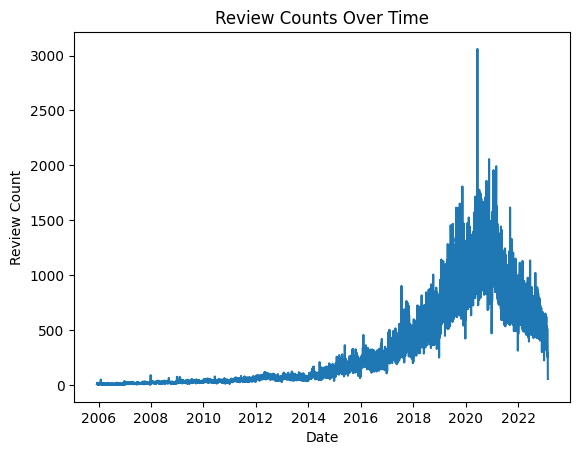

In [ ]:
qa_result['review_date'] = pd.to_datetime(qa_result['review_date'])

# Plotting the line chart
plt.plot(qa_result['review_date'], qa_result['review_count'])
plt.xlabel('Date')
plt.ylabel('Review Count')
plt.title('Review Counts Over Time')
plt.show()


### **Summary**

*   The line chart identified fluctuations in the review activity over time. The review activity slowly increased in trend from 2006, and then gained momentum from 2014. It continued that way until 2020, before it started to decrease in trend all the way to 2022.
*   The review activity had a spike in 2020, most countries where under lockdown during this period due to Covid-19. This probably contributed to the spike in review activity.


## **Analysis on Podcast Rating by Category**

In [ ]:
query_qb = """SELECT r.rating, c.category
FROM reviews r
JOIN categories c ON r.podcast_id = c.podcast_id
"""
qb_result = pd.read_sql_query(query_qb, con)

qb_result

,rating,category
0,5,arts
1,5,arts-performing-arts
2,5,music
3,5,arts
4,5,arts-performing-arts
...,...,...
4529478,5,business-careers
4529479,5,fiction
4529480,5,fiction-drama
4529481,5,music


In [ ]:
query_qba = """SELECT c.category, AVG(r.rating) AS avg_rating
FROM reviews r
JOIN categories c ON r.podcast_id = c.podcast_id
GROUP BY c.category
"""
qba_result = pd.read_sql_query(query_qba, con)

qba_result

,category,avg_rating
0,arts,4.727782
1,arts-books,4.681933
2,arts-design,4.811367
3,arts-fashion-beauty,4.649716
4,arts-food,4.781107
...,...,...
105,tv-film-after-shows,4.391995
106,tv-film-film-history,4.671959
107,tv-film-film-interviews,4.773748
108,tv-film-film-reviews,4.752084


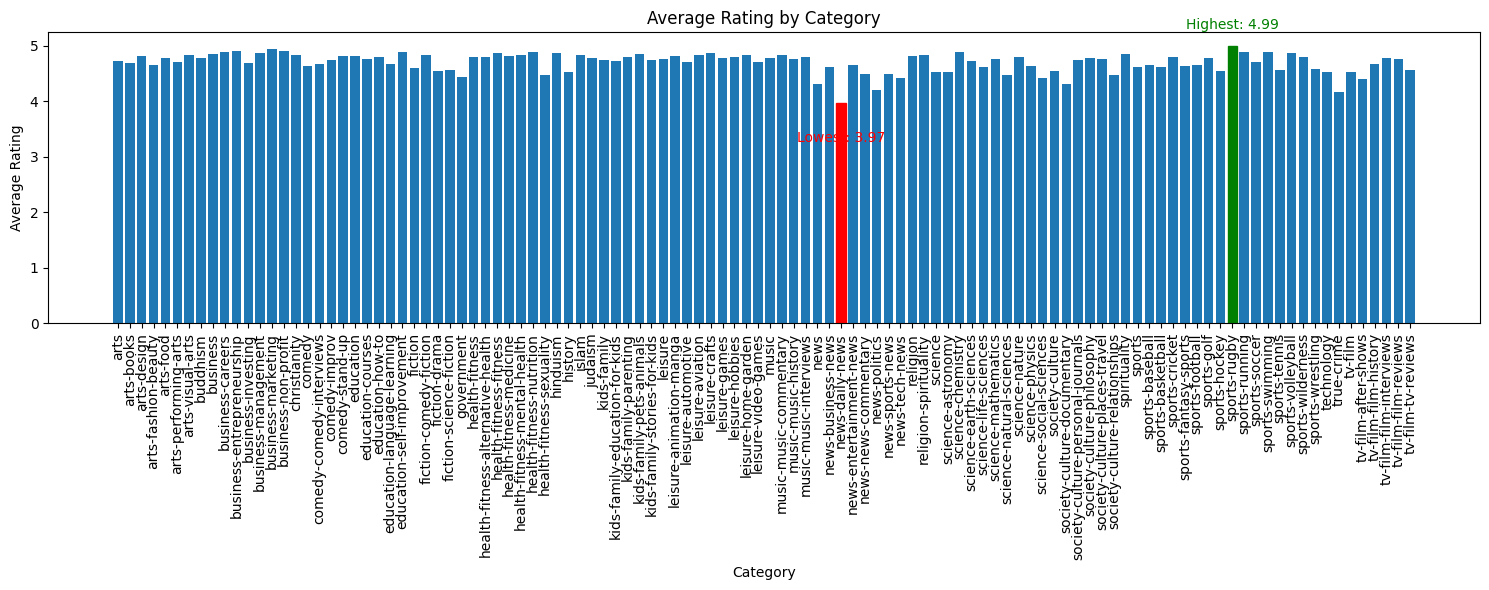

In [ ]:
plt.figure(figsize=(15, 6))
bars = plt.bar(qba_result['category'], qba_result['avg_rating'])

highest_color = 'green'
lowest_color = 'red'

highest_rating = qba_result['avg_rating'].max()
highest_category = qba_result.loc[qba_result['avg_rating'] == highest_rating, 'category'].iloc[0]

lowest_rating = qba_result['avg_rating'].min()
lowest_category = qba_result.loc[qba_result['avg_rating'] == lowest_rating, 'category'].iloc[0]

# Set green color
for bar in bars:
    if bar.get_height() == highest_rating:
        bar.set_color(highest_color)

# set red color
for bar in bars:
    if bar.get_height() == lowest_rating:
        bar.set_color(lowest_color)

# Adding the annotations
plt.annotate(f'Highest: {highest_rating:.2f}', xy=(highest_category, highest_rating),
             xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', color=highest_color)
plt.annotate(f'Lowest: {lowest_rating:.2f}', xy=(lowest_category, lowest_rating),
             xytext=(0, -20), textcoords='offset points', ha='center', va='top', color=lowest_color)

plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### **Summary**

Sports rugby had the highest average rating with 4.99, while news daily news had the lowest average rating with 3.97

## **Analysis on the Top 10 Reviewers**

In [ ]:
query_qc = """
SELECT author_id, COUNT(*) AS review_count
FROM reviews
GROUP BY author_id
ORDER BY review_count DESC
"""
result_qc = pd.read_sql_query(query_qc, con)

result_qc
top_reviewers = result_qc.head(10)

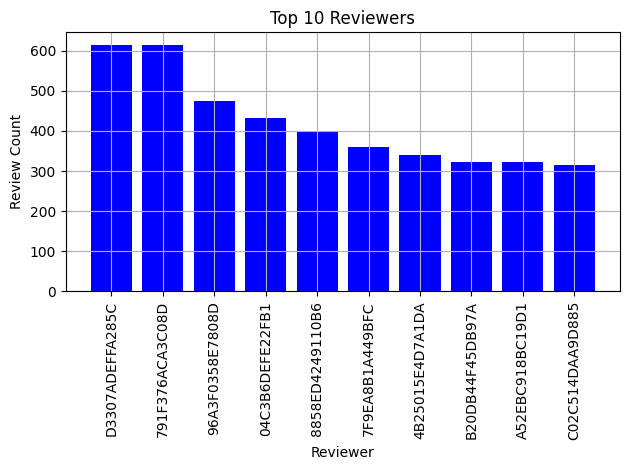

In [ ]:
import matplotlib.pyplot as plt

top_reviewers = top_reviewers.sort_values('review_count', ascending=False)

plt.bar(top_reviewers['author_id'], top_reviewers['review_count'], color='blue')
plt.xlabel('Reviewer')
plt.ylabel('Review Count')
plt.title('Top 10 Reviewers')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### **Summary**

The top two have a review count above 600

## **Analysis on The Top 10 Most Popular Podcast Episodes**

In [ ]:
query_ld = """
SELECT p.title, COUNT(*) AS listens
FROM podcasts p
JOIN reviews r ON p.podcast_id = r.podcast_id
GROUP BY p.title
ORDER BY listens DESC;
"""

result_ld = pd.read_sql_query(query_ld, con)
result_ld

,title,listens
0,Crime Junkie,33104
1,My Favorite Murder with Karen Kilgariff and Ge...,10675
2,Wow in the World,9698
3,The Ben Shapiro Show,8248
4,Story Pirates,7389
...,...,...
109269,"""The"" Lance Jay Radio Network (Best Of Series)",1
109270,"""Indirect"" with U.S. International Tim Ream & ...",1
109271,"""In My Voice"" with Kathy Grable",1
109272,"""Halftime"" with Chuck, Drew & Tom",1


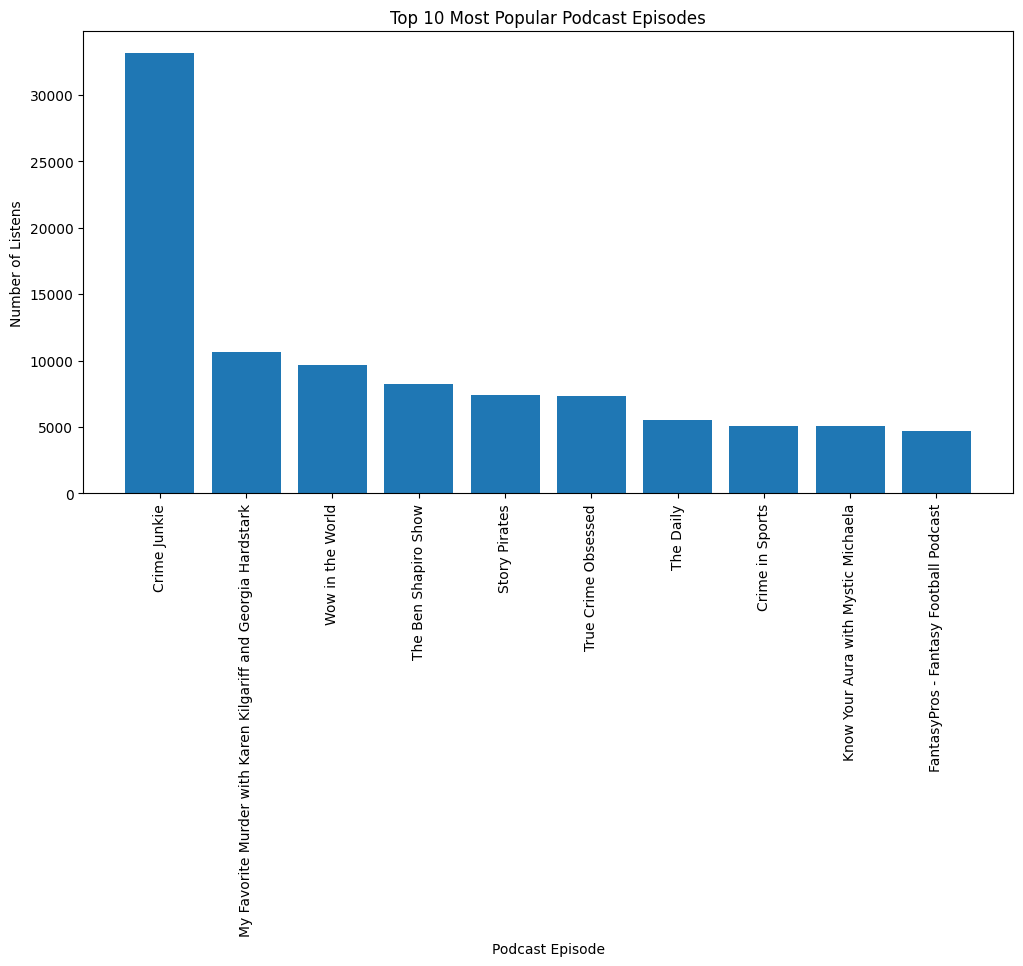

In [ ]:
import matplotlib.pyplot as plt

top_episodes = result_ld.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_episodes['title'], top_episodes['listens'])
plt.xticks(rotation=90)
plt.xlabel('Podcast Episode')
plt.ylabel('Number of Listens')
plt.title('Top 10 Most Popular Podcast Episodes')
plt.show()


### **Summary**

Podcast episode Crime Junkie had the highest no of listeners

## **4. Testing for Anomaly Using Isolation Forest Algorithm**

In [ ]:
query_if = """
SELECT category, COUNT(*) AS category_count
FROM categories
GROUP BY category
"""
result_if = pd.read_sql_query(query_if, con)
result_if



,category,category_count
0,arts,8953
1,arts-books,1978
2,arts-design,596
3,arts-fashion-beauty,610
4,arts-food,1074
...,...,...
105,tv-film-after-shows,604
106,tv-film-film-history,309
107,tv-film-film-interviews,258
108,tv-film-film-reviews,1172


In [ ]:
from sklearn.ensemble import IsolationForest

# look into the category_count column for anomaly detection
X = result_if[['category_count']]

feature_names = X.columns.tolist()

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
model.fit(X)

# Predicting the anomaly scores
anomaly_scores = model.decision_function(X)

result_if['anomaly_score'] = anomaly_scores

result_if = result_if.sort_values(by='anomaly_score', ascending=False)

top_anomalous_categories = result_if.head(10)
print(top_anomalous_categories)

                        category  category_count  anomaly_score
96                 sports-soccer             454       0.255624
27                 fiction-drama             457       0.253274
87               sports-baseball             443       0.253181
26        fiction-comedy-fiction             438       0.252513
75      science-natural-sciences             423       0.250889
60            news-business-news             470       0.250636
78       science-social-sciences             421       0.250407
23   education-language-learning             436       0.250051
101             sports-wrestling             418       0.249519
90         sports-fantasy-sports             482       0.246555


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### **Summary**

Sports-soccer is more anomalous compared to those with lower scores, this also suggests distributions that deviate more from the norm in terms of the number of podcasts present in each category.

## **5. Determine the relationship between variables by performing a chi-square test of independence**

In [ ]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(reviews_df['title'], reviews_df['rating'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)

print("P-value:", p_value)


P-value: 0.0


### **Summary**

A P-value of 0.0 indicates that the titles of the podcasts are related to the ratings given by the reviewers.

In [ ]:
merged_df = pd.merge(podcasts_df, categories_df, on="podcast_id")

cross_tab = pd.crosstab(merged_df['title'], merged_df['category'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)

print("P-value:", p_value)


P-value: 1.0


### **Summary**

 based on the obtained p-value of 1.0, we can conclude that there is no significant relationship between the "title" variable in the "Podcasts" table and the "category" variable in the "Categories" table.

## **6. Performing a statistical inference using the review table**

Target Population: The target population is all the reviews in the dataset.

Statistical Hypotheses:

  1. Null Hypothesis (H0): There is no difference in the average ratings for different podcasts.
  2. Alternative Hypothesis (HA): There is a significant difference in the average ratings for different podcasts.

Significance Level: Significance level (alpha) is 0.05,

**A. Calculate Descriptive Statistics**

We'll start by calculating some descriptive statistics to get an overview of the data.

In [ ]:

mean_ratings = reviews_df.groupby('podcast_id')['rating'].mean()

print("Mean Ratings:")
print(mean_ratings)


Mean Ratings:
podcast_id
a00018b54eb342567c94dacfb2a3e504    5.00
a00043d34e734b09246d17dc5d56f63c    5.00
a0004b1ef445af9dc84dad1e7821b1e3    1.00
a00071f9aaae9ac725c3a586701abf4d    5.00
a000a500f06555f81220c3eb641aded7    5.00
                                    ... 
ffff32caeedd6254573ad1cc49852595    5.00
ffff5db4b5db2d860c49749e5de8a36d    4.75
ffff66f98c1adfc8d0d6c41bb8facfd0    5.00
ffff923482740bc21a0fe184865ec2e2    5.00
ffffbd44ec5f79d502f16ae372bf2d4f    5.00
Name: rating, Length: 111544, dtype: float64


**B. Perform Hypothesis Test using ANOVA test**

We'll perform a one-way ANOVA test to determine if there is a significant difference in the average ratings among the podcasts.

In [ ]:
import scipy.stats as stats

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*[group['rating'] for _, group in reviews_df.groupby('podcast_id')])

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 5.12525721370374
P-value: 0.0


### **Summary**

F-statistic of 5.12525721370374 indicates that there is some variation between the group means. The p-value of 0.0 suggests that the observed differences are highly statistically significant

**C. Interpret the Results**

Compare the p-value to the significance level (alpha) to make a decision.

In [ ]:
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the average ratings for different podcasts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average ratings for different podcasts.")


Reject the null hypothesis. There is a significant difference in the average ratings for different podcasts.


**Performing Hypothesis Test using z-test**

In [ ]:
from scipy import stats

hypothesized_mean = 5.0

ratings = reviews_df['rating']

sample_mean = np.mean(ratings)
sample_std = np.std(ratings)

n = len(ratings)

sem = sample_std / np.sqrt(n)

z = (sample_mean - hypothesized_mean) / sem

alpha = 0.05

critical_z = stats.norm.ppf(1 - alpha / 2)

if abs(z) > critical_z:
     print("Reject the null hypothesis. There is a significant difference in the average ratings for different podcasts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average ratings for different podcasts.")

Reject the null hypothesis. There is a significant difference in the average ratings for different podcasts.


### **Summary**

There was a significant difference in the average ratings for different podcasts, the null hypothesis was rejected. For both ANOVA and Z-tests

**D. Construct Confidence Intervals**

Lets use t-distribution to calculate a 95% confidence interval for the mean ratings of a specific podcast.

In [ ]:

podcast_ratings = reviews_df[reviews_df['podcast_id'] == 'c61aa81c9b929a66f0c1db6cbe5d8548']['rating']

mean = np.mean(podcast_ratings)
std_dev = np.std(podcast_ratings)

margin_of_error = 1.96 * (std_dev / np.sqrt(len(podcast_ratings)))

# Confidence interval construction
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Confidence Interval (95%):", confidence_interval)


Confidence Interval (95%): (5.0, 5.0)


### **Summary**

The confidence interval is quite narrow, with both the lower and upper bounds being equal to 5.0. This suggests a high level of certainty that the population parameter rating for podcast_id "c61aa81c9b929a66f0c1db6cbe5d8548" is exactly 5.0.

## **Google Data Studio dashboard**

https://lookerstudio.google.com/s/v6ca6OLjxCA

## **Conclusion**

This report introduced the Podcast Reviews Dataset and outlined the objectives and methodologies of the EDA. It highlighted the tables within the dataset and discussed the potential benefits for Aftermath Entertainment Inc. From the analysis I can conclude that in order to maintain and attract a huge amount of listeners and, reviews. As an entertainment company you should focus more on films, as well as sports categories for producing podcasts. These two categories tend to attract more listeners and reviews, and can also lead to increased revenues for your company. Futhermore, the title variable is related to the rating variable, so there is a strong need to use catchy titles for the podcasts, as it contributes to the ratings.

# **Suggestions For Improving Analysis**

* More visualizations can be used.
* More machine Learning techniques can be used to do analysis on the reviews table.

# **Thank You**